<a href="https://colab.research.google.com/github/moaaztaha/Arabic-Image-Captioning-Demo/blob/main/Demo_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from ipywidgets import FileUpload
import matplotlib.pyplot as plt
from pathlib import Path
import warnings
import os

def setup():
    print("Cloning repos....")
    os.system("git clone https://github.com/moaaztaha/Arabic-Image-Captioning-Demo")
    os.system("git clone https://github.com/aub-mind/arabert")
    os.system("mv  -v /content/Arabic-Image-Captioning-Demo/* .")
    os.system("pip install -r requirements.txt")
    warnings.filterwarnings("ignore")
setup()

Cloning repos....


In [2]:
from caption import caption_image

100%|██████████| 241M/241M [00:26<00:00, 9.18MiB/s]


[2021-09-26 14:15:33,793 - farasapy_logger - WARNING]: Be careful with large lines as they may break on interactive mode. You may switch to Standalone mode for such cases.


In [3]:
# setting up the environment
# downloading the model
if Path('BEST_checkpoint_flickr8k_ar_arabert_finetune.pth.tar').is_file():
    print("Model file exists!!!")
else:
    print("Downloading model...")
    os.system('gdown --id 1-iVSv8ZVBEmPfe_1AbrshmNDqPZmE5-C')

In [4]:
upload = FileUpload()
upload

FileUpload(value={}, description='Upload')

100%|██████████| 24000/24000 [00:00<00:00, 179639.12it/s]


----------------------------------------------------------------------------------------------------
فتاة في الماء


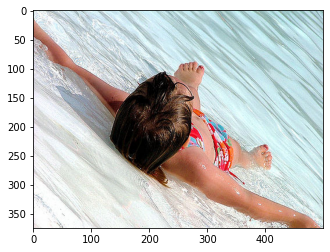

In [5]:
output = caption_image(upload)
if len(upload.data):
  img=plt.imread("test.png", 0)
  plt.imshow(img)
  # plt.title(output)
print("-"*100)
print(output)